# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-Svpk0lXb-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 72984.12 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 94511.75 examples/s]

Filter (num_proc=6):  49%|████▉     | 55374/112120 [00:00<00:00, 108325.40 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 141908.67 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 75001.42 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 105189.95 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 142525.17 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 146054.02 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 150394.22 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.99 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.94 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.50 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.96 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.08 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.18 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.98 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.31 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.86 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.76 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.10 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.41 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.16 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.46 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.12 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.51 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.09 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.45 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.08 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.33 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.28 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.29 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.35 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.26 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.87 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.39 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.99 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.25 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.78 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.47 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 34.42 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.05 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.64 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 33.57 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.31 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.32 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 45.59 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.17 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.30 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.22 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.01 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.03 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.18 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.94 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.40 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.59 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.89 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.00 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.89 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.56 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.32 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.35 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.16 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.14 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.60 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.61 examples/s]

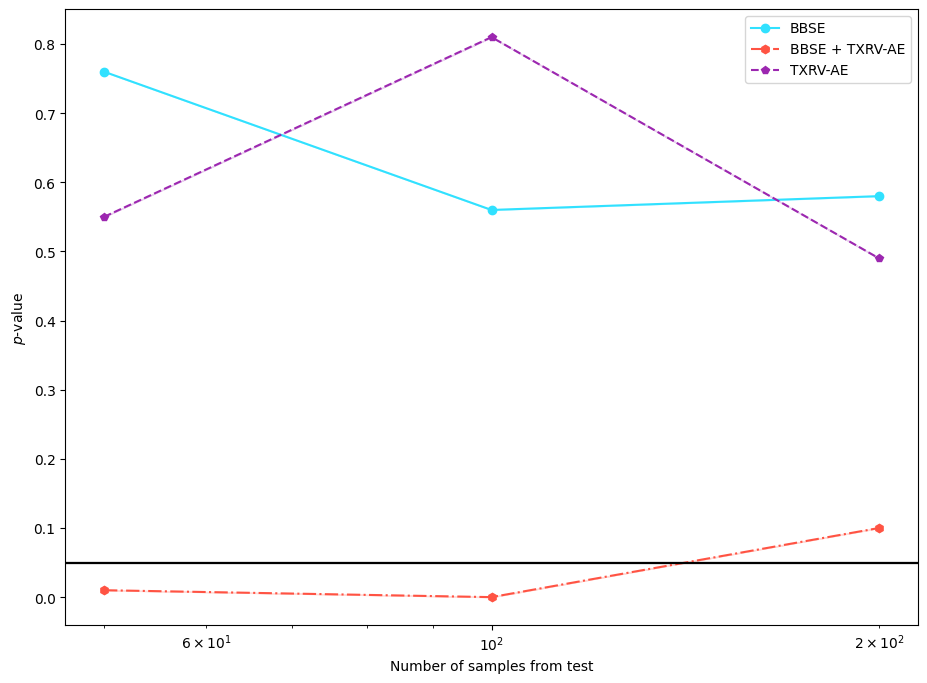

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.64 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.21 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.88 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.73 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.63 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.48 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.97 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.40 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.24 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.93 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.65 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.91 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.78 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.25 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.65 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.48 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.00 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.55 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.45 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.08 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.04 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.63 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.59 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.96 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.45 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.86 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.97 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.45 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.70 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.10 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.00 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.47 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.54 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.88 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.35 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.33 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.34 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.88 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.41 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.44 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.30 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.36 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.58 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.12 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.71 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.43 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.40 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.62 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.98 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.66 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.29 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.87 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.20 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.01 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.90 examples/s]

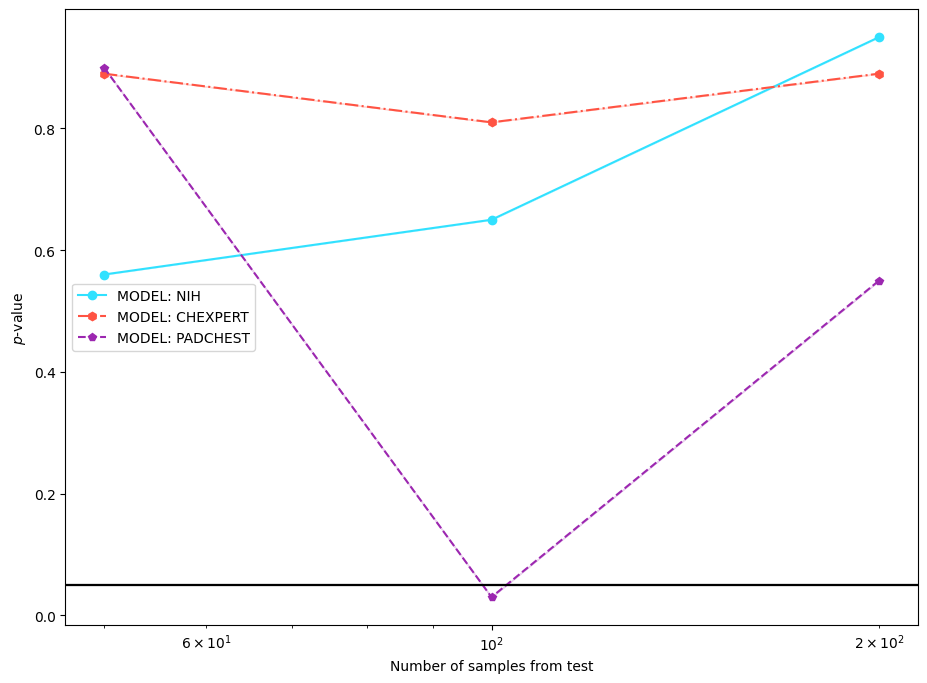

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 57555.41 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 82801.48 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 96180.92 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 103640.60 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 107660.53 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111701.64 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53064.96 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 77832.77 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 92062.63 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 101000.55 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 106809.41 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 112296.62 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.45 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.92 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.30 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.59 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.23 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.33 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.55 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.77 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.02 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.25 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.70 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.18 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.43 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.23 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.23 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.56 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.76 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52387.03 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 77141.14 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 90813.25 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 99633.54 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 105284.77 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109934.05 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52296.60 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 77201.35 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91674.14 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 97950.29 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 105032.61 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 110481.41 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.35 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.78 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.47 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.29 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.73 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.05 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.78 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.60 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.91 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.27 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.32 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.94 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.01 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.36 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.27 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.21 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.59 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.10 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.87 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53698.16 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 79715.81 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91026.12 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 100549.36 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 106154.44 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 114510.05 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51574.54 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73065.61 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85458.34 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 95503.12 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 104316.69 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 110114.99 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.50 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.16 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.08 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.29 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.97 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.43 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.47 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.14 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.84 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.22 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.28 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.39 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.88 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.83 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.55 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.60 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.44 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.83 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.96 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54427.30 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 74952.49 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 88538.16 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98908.32 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 105165.75 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109158.06 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53084.54 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 79178.71 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 93217.61 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 101793.70 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 106553.36 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111002.72 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.67 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.40 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.13 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.06 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.00 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.87 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.19 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.68 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.52 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.01 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.86 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.72 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.22 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.67 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.64 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.09 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.53 examples/s]

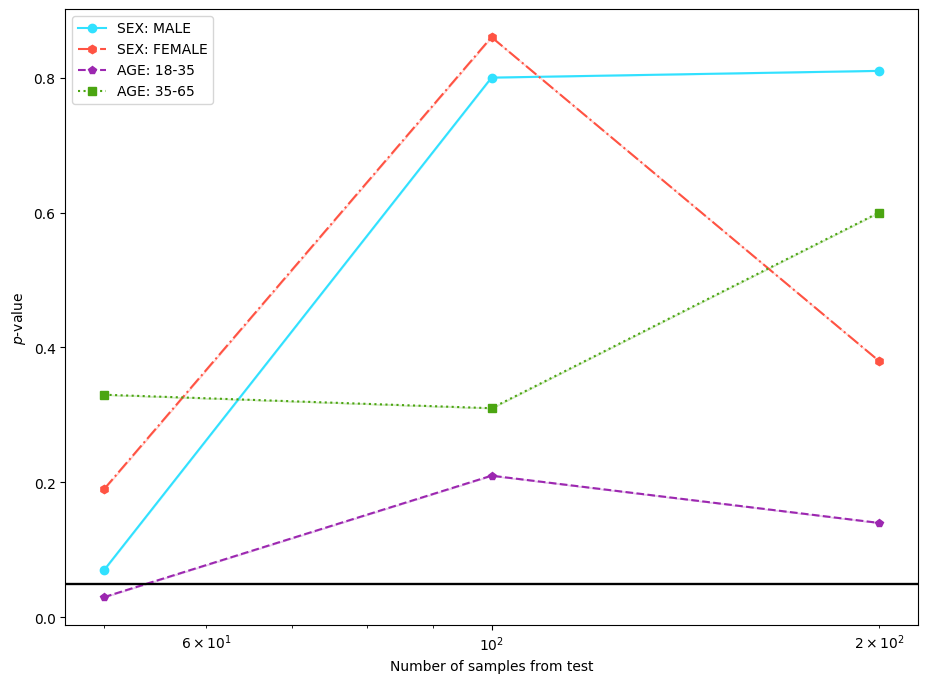

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.48 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.64 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.19 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.26 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.87 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.66 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.48 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.09 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.21 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.12 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.59 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.39 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.38 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.98 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.06 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.74 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.22 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.78 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.38 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.59 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.17 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.25 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.91 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.02 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.01 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.19 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.27 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.12 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.32 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.96 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.00 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.62 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.16 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.29 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.66 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.28 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.39 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.14 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.30 examples/s]

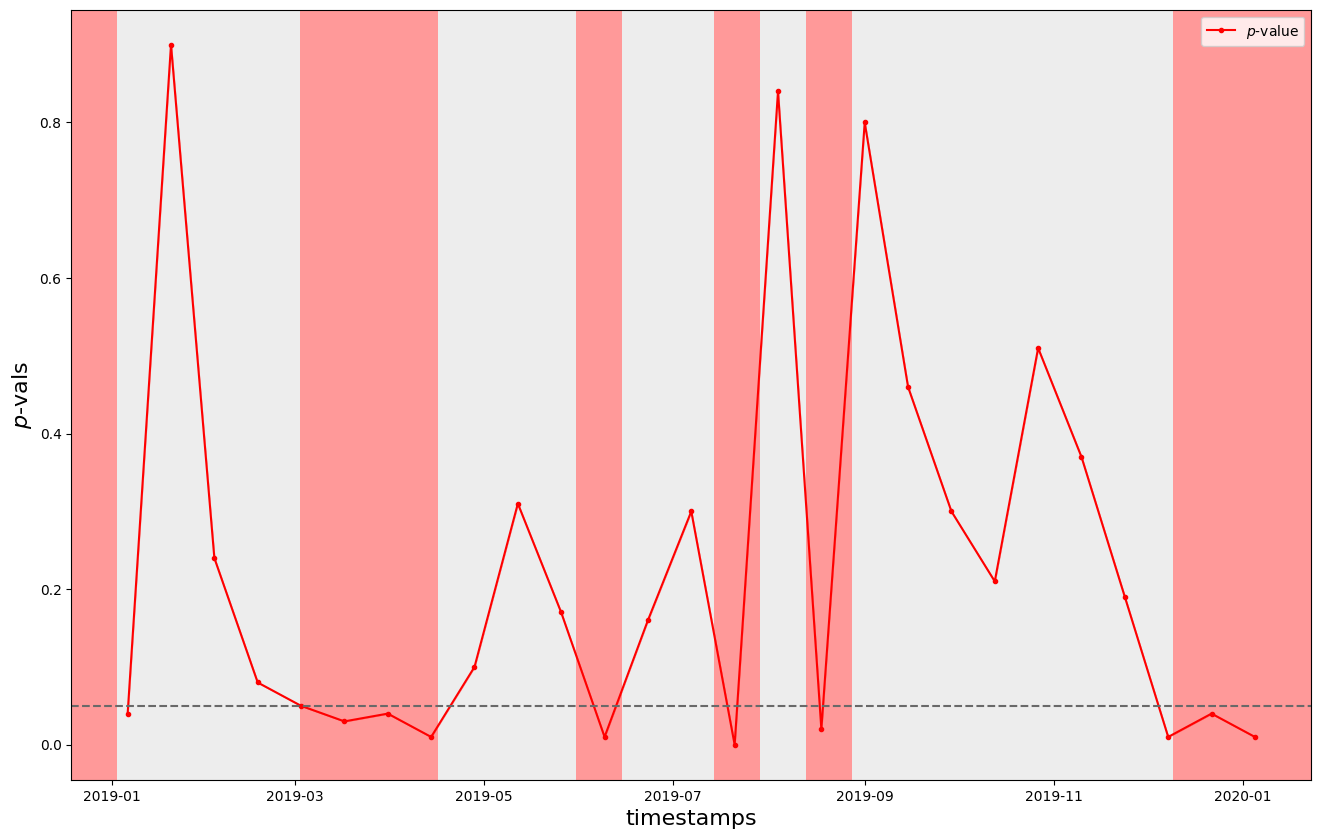

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)